In [175]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os
# change to your local path to project below
project_path = '/home/jorge/Insync/jorgitoje@gmail.com/OneDrive/Documentos/JORGE/EDUCATION/MASTER_DATASCIENCE/Semester1/AdvancedStatistics/GroupProject/KDS_Statistics_GroupProject'

In [176]:

dataset_path = os.path.join( '../datasets/USA_houseprices_2014/')

file_name = 'data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path+file_name)

In [177]:
X = df.drop(['price', 'date'], axis = 1)
y = df['price']

# Cleaning NaNs

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

There is no null in the dataset

[Text(0.5, 1.0, 'Price distribution')]

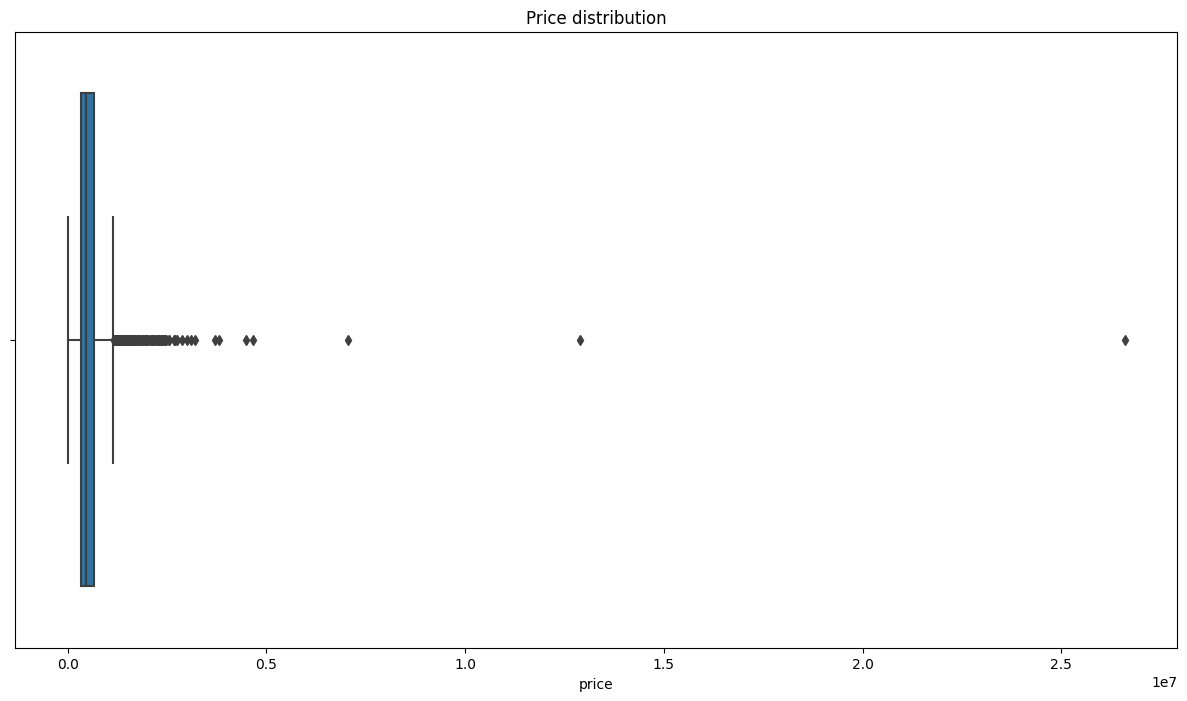

In [179]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(15,8))
sns.boxplot(x=y).set(title='Price distribution')

There are three big outliers. We should conciderate how to deal with it.

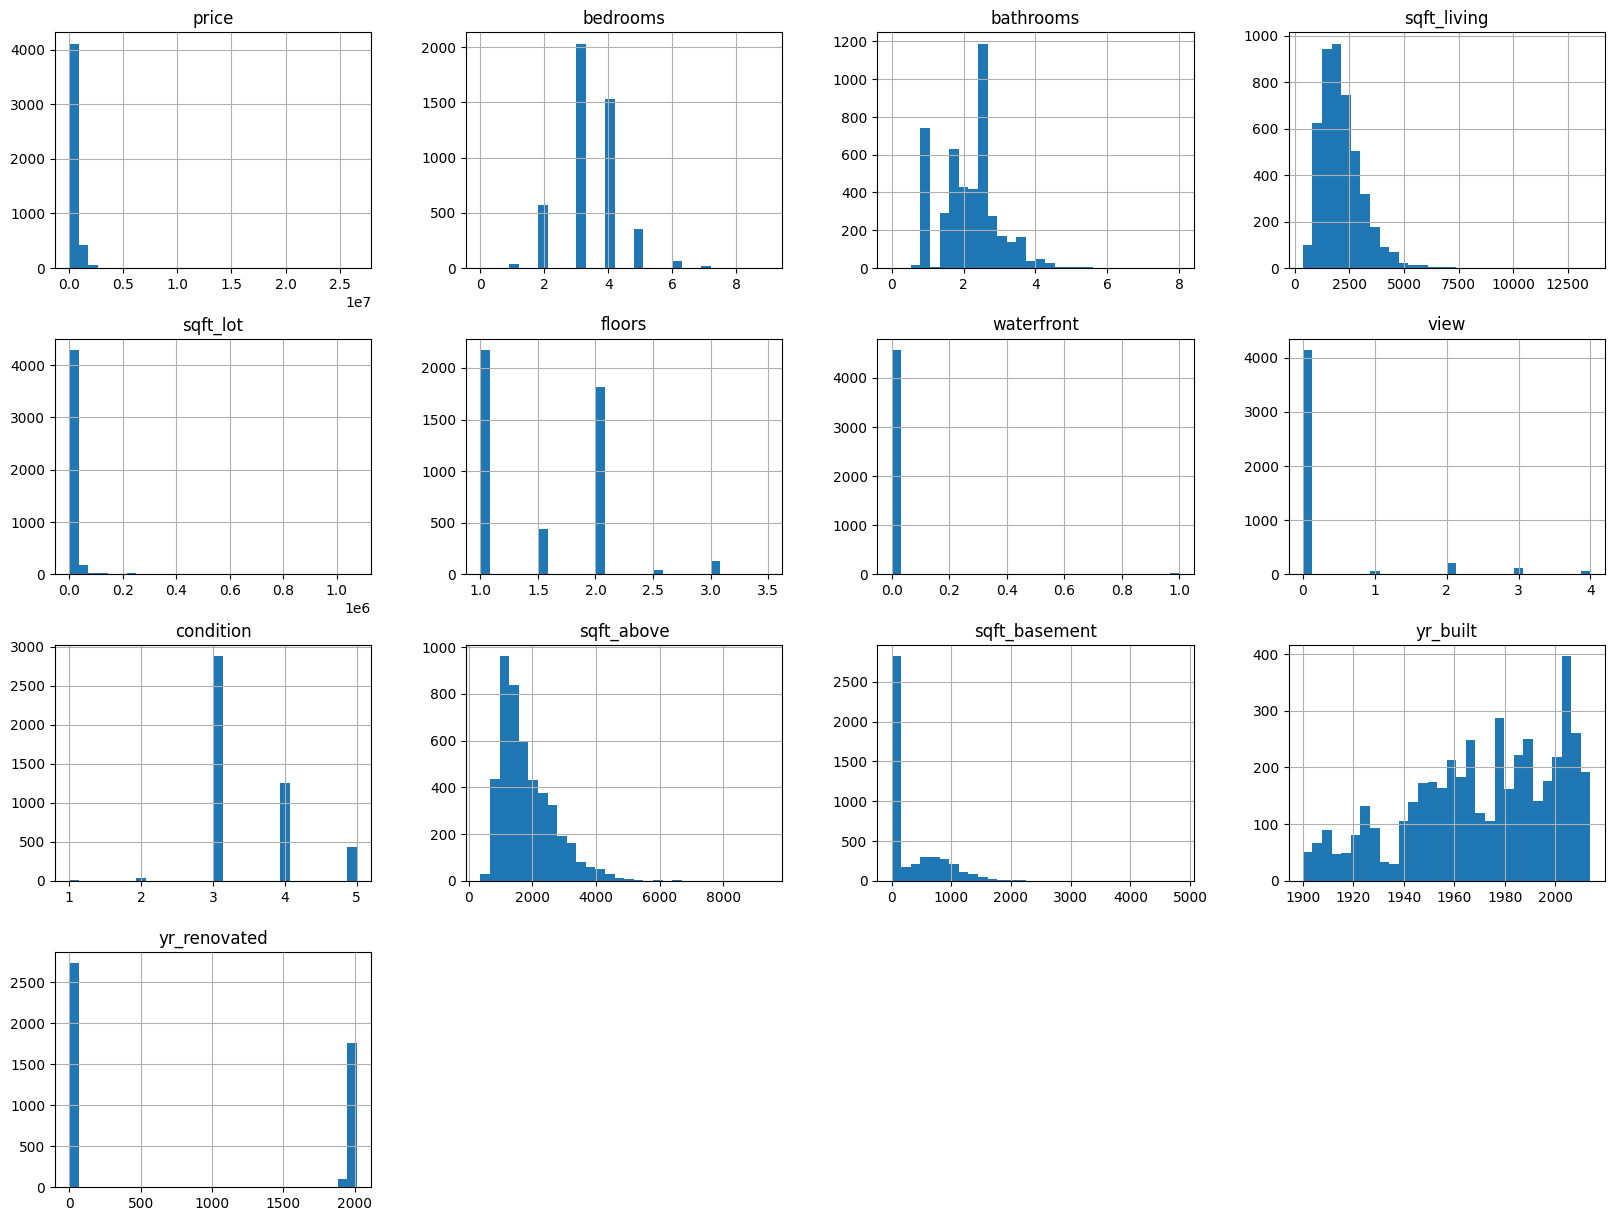

In [180]:
df.hist(bins=30, figsize=(20,15))
plt.show()

# Feature creation

In [181]:
import numpy as np
last_modification = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])

In [182]:
X['last_modification'] = last_modification

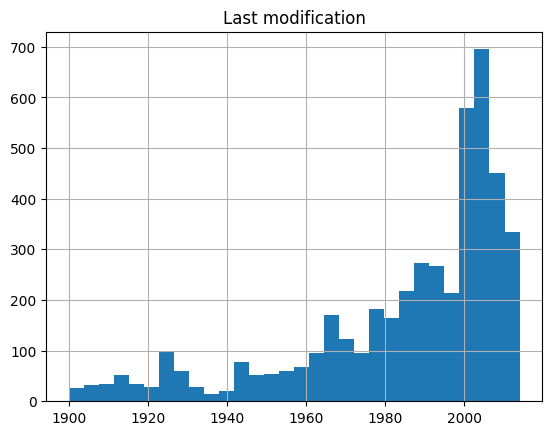

In [183]:
X['last_modification'].hist(bins=30).set(title='Last modification')
plt.show()

In [184]:
have_basement = np.where(df['sqft_basement'] == 0, 'false', 'true')
X['have_basement'] = have_basement

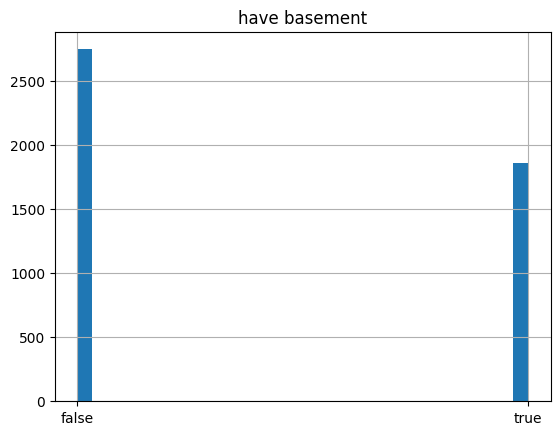

In [185]:
X['have_basement'].hist(bins=30).set(title='have basement')
plt.show()

#### unique values

In [186]:
u = df['bedrooms'].unique()
u.sort()
u

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [187]:
u = df['bathrooms'].unique()
u.sort()
u

array([0.  , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.25, 6.5 , 6.75, 8.  ])

In [188]:
u = df['waterfront'].unique()
u.sort()
u

array([0, 1])

# Encoding 

Choose encoding

In [189]:
print(len(df['street'].unique()))

4525


In [190]:
df['street'].nunique()

4525

In [191]:
df['city'].nunique()

44

In [192]:
df['statezip'].nunique()

77

In [193]:
df['country'].nunique()

1

#### Label-encoding

In [194]:
le = preprocessing.LabelEncoder()

df_columns = [df.street, df.city, df.statezip,
              df.country]
for i in df_columns:
    i = le.fit_transform(i)

X.street = le.fit_transform(df.street)
X.city = le.fit_transform(df.city)
X.statezip = le.fit_transform(df.statezip)
X.country = le.fit_transform(df.country)


print('the set has {} rows and {} columns'.format(X.shape[0], X.shape[1]))
X

the set has 4600 rows and 18 columns


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0,2005,false
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,1921,true
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,1966,false
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,1963,true
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,1992,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0,1979,false
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0,2009,false
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0,2009,false
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0,1974,true


#### One-hot-encoding

In [195]:
onehot = pd.concat((df,pd.get_dummies(df.city)),1)

/var/folders/68/8msv38hx38v_2kjty7hk1bsc0000gn/T/ipykernel_7222/772063035.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  onehot = pd.concat((df,pd.get_dummies(df.city)),1)


In [196]:
onehot.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


# Scaling

check distribution
https://medium.datadriveninvestor.com/how-would-i-know-if-my-variable-distribution-is-gaussian-c3b215383469

Text(0.5, 1.0, 'price')

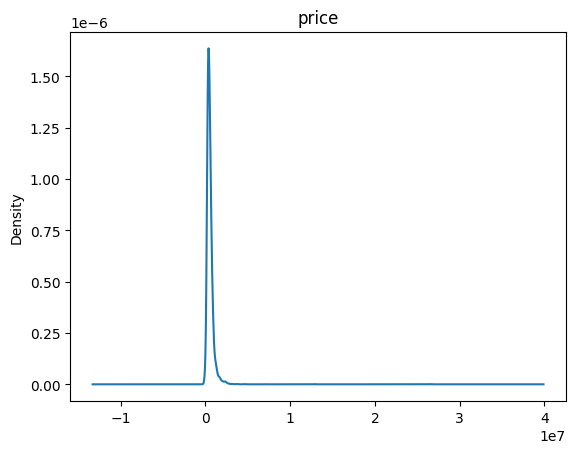

In [197]:
ax = y.plot.kde()
ax.set_title('price')

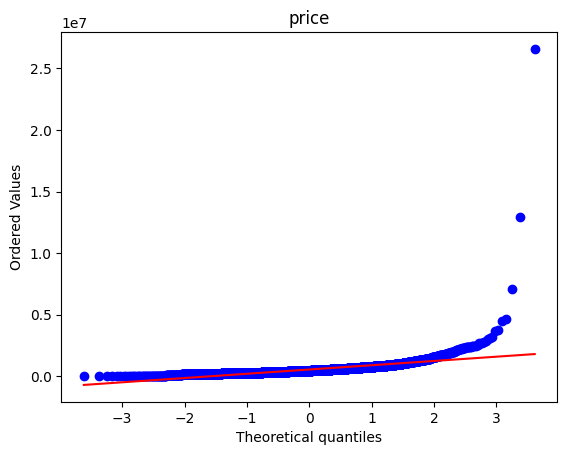

In [198]:
from scipy.stats import probplot
probplot(x=y,dist='norm',plot=plt)
plt.title('price')
plt.show()

In [199]:
to_normalize = X.columns.drop('have_basement')


In [200]:
from scipy.stats import shapiro
print(f'price: {"Not Gaussian" if shapiro(y)[1]<0.05 else "Gaussian"}  {shapiro(y)}')


for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if shapiro(X[col],)[1]<0.05 else "Gaussian"}  {shapiro(X[col])}')


price: Not Gaussian  ShapiroResult(statistic=0.38064926862716675, pvalue=0.0)
bedrooms Not Gaussian for  ShapiroResult(statistic=0.8838747143745422, pvalue=0.0)
bathrooms Not Gaussian for  ShapiroResult(statistic=0.934399425983429, pvalue=5.006278893646841e-41)
sqft_living Not Gaussian for  ShapiroResult(statistic=0.9023698568344116, pvalue=0.0)
sqft_lot Not Gaussian for  ShapiroResult(statistic=0.2747177481651306, pvalue=0.0)
floors Not Gaussian for  ShapiroResult(statistic=0.7600158452987671, pvalue=0.0)
waterfront Not Gaussian for  ShapiroResult(statistic=0.05567944049835205, pvalue=0.0)
view Not Gaussian for  ShapiroResult(statistic=0.3437766432762146, pvalue=0.0)
condition Not Gaussian for  ShapiroResult(statistic=0.7129557728767395, pvalue=0.0)
sqft_above Not Gaussian for  ShapiroResult(statistic=0.891318678855896, pvalue=0.0)
sqft_basement Not Gaussian for  ShapiroResult(statistic=0.7160404920578003, pvalue=0.0)
yr_built Not Gaussian for  ShapiroResult(statistic=0.94933253526687

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [201]:

from scipy.stats import kstest
normal_dist = y
print(f'{"Not Gaussian" if kstest(normal_dist,"norm")[1]<0.05 else "Gaussian"}  {kstest(normal_dist,"norm")}')

Not Gaussian  KstestResult(statistic=0.9893478260869565, pvalue=0.0)


In [202]:
print(f'{"Not Gaussian" if kstest(y.values,"norm")[1]<0.05 else "Gaussian"}  {kstest(y.values,"norm")}')
for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if kstest(X[col],"norm")[1]<0.05 else "Gaussian"}  {kstest(X[col],"norm")}')

Not Gaussian  KstestResult(statistic=0.9893478260869565, pvalue=0.0)
bedrooms Not Gaussian for  KstestResult(statistic=0.9685542158779078, pvalue=0.0)
bathrooms Not Gaussian for  KstestResult(statistic=0.8372143112859343, pvalue=0.0)
sqft_living Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
sqft_lot Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
floors Not Gaussian for  KstestResult(statistic=0.8413447460685429, pvalue=0.0)
waterfront Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
view Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
condition Not Gaussian for  KstestResult(statistic=0.9903892324031525, pvalue=0.0)
sqft_above Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
sqft_basement Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
yr_built Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
yr_renovated Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
street Not Gaussian for  KstestResult(statistic=0.99909

In [203]:
from scipy.stats import normaltest
print(f'{"Not Gaussian" if normaltest(y.values,)[1]<0.05 else "Gaussian"}  {normaltest(y.values)}')



for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if normaltest(X[col],)[1]<0.05 else "Gaussian"}  {normaltest(X[col])}')


Not Gaussian  NormaltestResult(statistic=11157.561434468633, pvalue=0.0)
bedrooms Not Gaussian for  NormaltestResult(statistic=265.8869022054837, pvalue=1.8339723381306336e-58)
bathrooms Not Gaussian for  NormaltestResult(statistic=448.2080471203569, pvalue=4.708246535413369e-98)
sqft_living Not Gaussian for  NormaltestResult(statistic=1868.5588567673785, pvalue=0.0)
sqft_lot Not Gaussian for  NormaltestResult(statistic=7765.785085140093, pvalue=0.0)
floors Not Gaussian for  NormaltestResult(statistic=313.15121262486235, pvalue=1.0001800273669057e-68)
waterfront Not Gaussian for  NormaltestResult(statistic=7717.136573762737, pvalue=0.0)
view Not Gaussian for  NormaltestResult(statistic=3134.16376740503, pvalue=0.0)
condition Not Gaussian for  NormaltestResult(statistic=519.1630481508806, pvalue=1.841520212385201e-113)
sqft_above Not Gaussian for  NormaltestResult(statistic=1389.0639631014435, pvalue=2.336645919732844e-302)
sqft_basement Not Gaussian for  NormaltestResult(statistic=1511

In [204]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0,2005,false
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,1921,true
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,1966,false
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,1963,true
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,1992,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0,1979,false
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0,2009,false
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0,2009,false
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0,1974,true


In [210]:
from sklearn.preprocessing import MinMaxScaler

have_basement = X['have_basement']

X_normalized = X[to_normalize]


mm = MinMaxScaler() # creating an instance of the class object
X_normalized = pd.DataFrame(mm.fit_transform(X_normalized), columns=X_normalized.columns)  #fit and transforming MinMaxScaler the dataframe 

X_normalized['have_basement'] = have_basement
X_normalized

## adding price column

X_normalized['price'] = y


output_filename = 'USA-HOUSEPRICES-2014-NORMALIZED.csv'
X_normalized.to_csv(dataset_path + output_filename, index=False )

In [206]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(pd.DataFrame(y))
print(sc_X)

[[-0.42386353]
 [ 3.2495981 ]
 [-0.37242442]
 ...
 [-0.23956224]
 [-0.61826787]
 [-0.58775916]]


[Text(0.5, 1.0, 'Price distribution')]

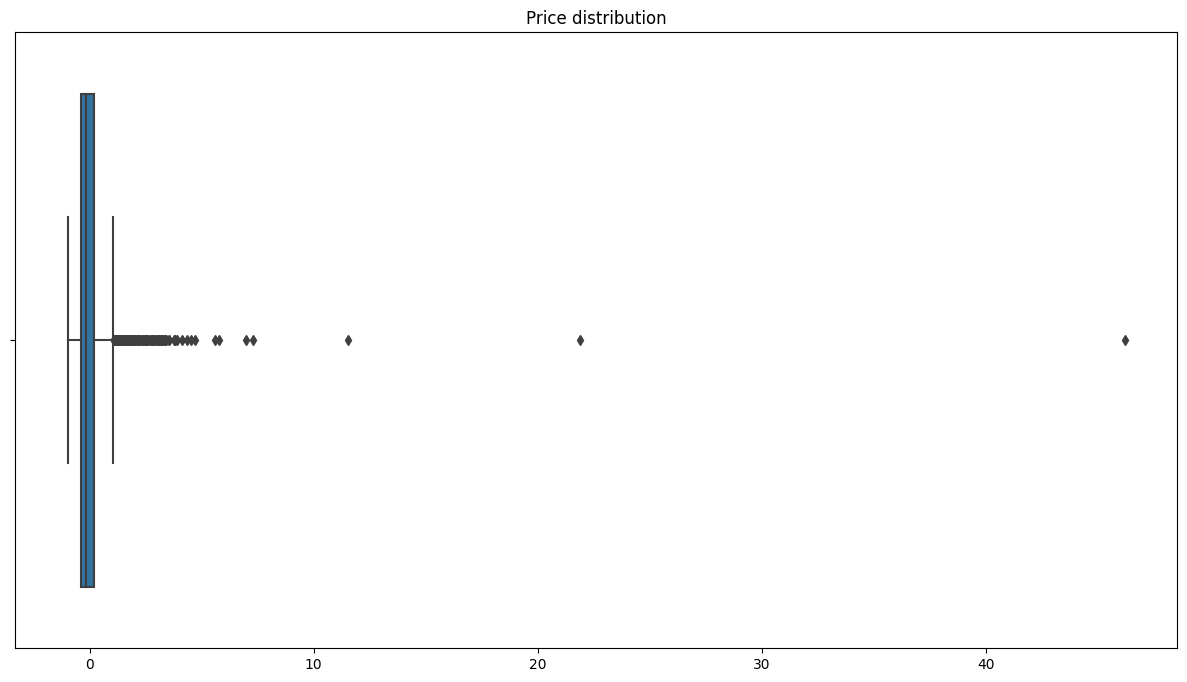

In [207]:
plt.figure(figsize=(15,8))
sns.boxplot(x=sc_X).set(title='Price distribution')

In [107]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# minmax = scaler.fit_transform(pd.DataFrame(y))
# print(minmax)

In [108]:
# plt.figure(figsize=(15,8))
# sns.boxplot(x=minmax).set(title='Price distribution')

# Data exploration

In [109]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [110]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [111]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [112]:
df.groupby(['country','statezip', 'city', 'street']).mean()

price  bedrooms  \
country statezip city      street                                        
USA     WA 98001 Algona    130 Main St              196440.0       3.0   
                           138 Seattle Blvd S       100000.0       2.0   
                           322 9th Ave N            230000.0       3.0   
                           429 Milwaukee Blvd S     248000.0       4.0   
                           434 Pullman Ave          262000.0       4.0   
...                                                      ...       ...   
        WA 98288 Skykomish 11881 Tye River Rd NE    150000.0       3.0   
                           235 Thelma St            134000.0       2.0   
                           69506 NE Money Creek Rd  415000.0       3.0   
        WA 98354 Milton    1705 Douglas Ct          250000.0       3.0   
                           99 17th Ave              320000.0       3.0   

                                                    bathrooms  sqft_living  \
country statezip city      street                                            
USA     WA 98001 Algona    130 Main St                   2.00       1560.0   
                           138 Seattle Blvd S            1.00        910.0   
                           322 9th Ave N                 1.00       1390.0   
                           429 Milwaukee Blvd S          3.00       2163.0   
                           434 Pullman Ave               2.50       2020.0   
...                                                       ...          ...   
        WA 98288 Skykomish 11881 Tye River Rd NE         0.75        490.0   
                           235 Thelma St                 1.50        980.0   
                           69506 NE Money Creek Rd       2.75       2600.0   
        WA 98354 Milton    1705 Douglas Ct               1.75       1140.0   
                           99 17th Ave                   1.75       1370.0   

                                                    sqft_lot  floors  \
country statezip city      street                                      
USA     WA 98001 Algona    130 Main St                7352.0     1.0   
                           138 Seattle Blvd S        22000.0     1.0   
                           322 9th Ave N             16000.0     1.0   
                           429 Milwaukee Blvd S       5883.0     2.0   
                           434 Pullman Ave            6236.0     2.0   
...                                                      ...     ...   
        WA 98288 Skykomish 11881 Tye River Rd NE     38500.0     1.5   
                           235 Thelma St              5000.0     2.0   
                           69506 NE Money Creek Rd   64626.0     1.5   
        WA 98354 Milton    1705 Douglas Ct           10400.0     1.0   
                           99 17th Ave                9900.0     1.0   

                                                    waterfront  view  \
country statezip city      street                                      
USA     WA 98001 Algona    130 Main St                     0.0   0.0   
                           138 Seattle Blvd S              0.0   0.0   
                           322 9th Ave N                   0.0   0.0   
                           429 Milwaukee Blvd S            0.0   0.0   
                           434 Pullman Ave                 0.0   0.0   
...                                                        ...   ...   
        WA 98288 Skykomish 11881 Tye River Rd NE           0.0   0.0   
                           235 Thelma St                   0.0   0.0   
                           69506 NE Money Creek Rd         0.0   0.0   
        WA 98354 Milton    1705 Douglas Ct                 0.0   0.0   
                           99 17th Ave                     0.0   0.0   

                                                    condition  sqft_above  \
country statezip city      street                                           
USA     WA 98001 Algona    130 Main St           

In [113]:
X.shape

(4600, 18)

In [114]:
y.shape

(4600,)

In [115]:
df.shape

(4600, 18)

In [116]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


[Text(0.5, 1.0, 'Price distribution')]

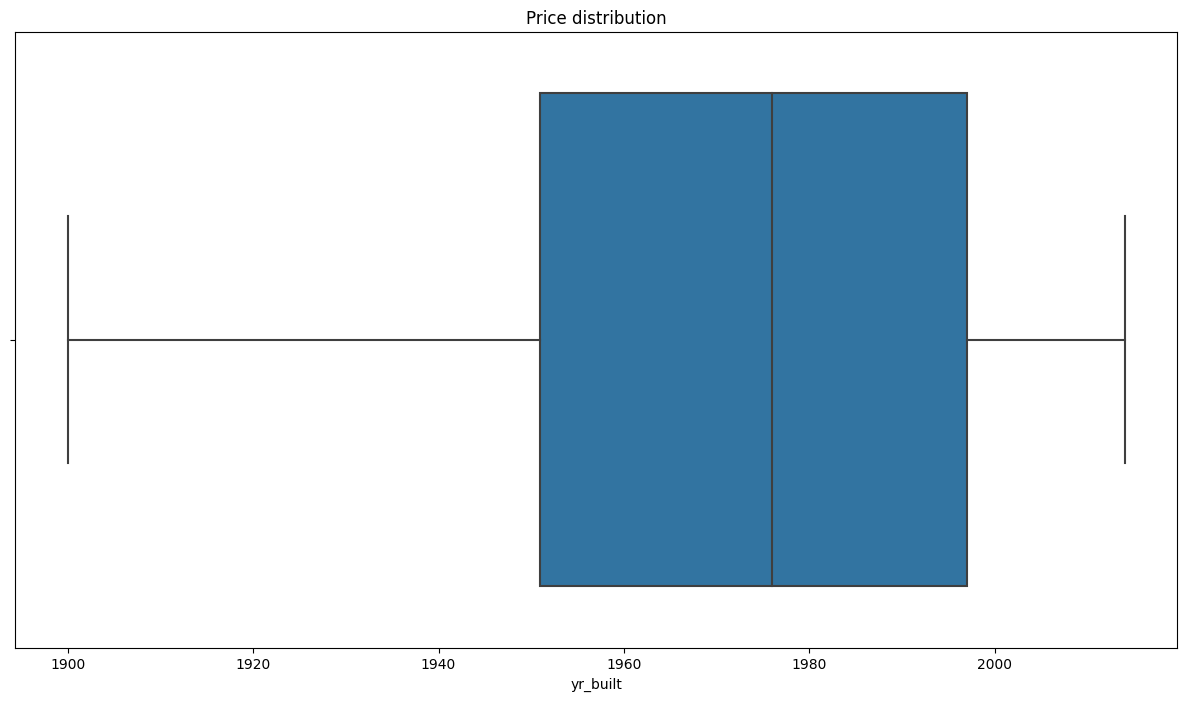

In [117]:

plt.figure(figsize=(15,8))
sns.boxplot(x=X['yr_built']).set(title='Price distribution')